In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from datetime import datetime

plt.rcParams['font.family'] = 'Malgun Gothic'
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')

# 데이터 불러오기
- id : 거래번호, 정수
- sigungu : 시군구
- jibun : 지번
- apt_name : 아파트 이름
- exclusive_use_area : 전용면적
- transaction_year_month : 거래연월
- transaction_day: 거래일
- transaction_real_price : 실거래가
- floor : 층수
- year_of_completion : 건설 완료 연도

서울특별시 강남구 대치동 지역만 존재


In [119]:
data = pd.read_csv('../data/log_data.csv')
data.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,year,cluster_0.0,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0,use_area,transaction_year
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,2,180000.0,2.833213,2005,train,2014-01-02,112.6,66.6,1.252763,0.9,20,180000.0,11.502885,3.258097,9,2014,0,0,0,1,0,145.83,2014
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,2,68000.0,1.791759,2008,train,2014-01-02,112.6,66.6,1.252763,0.9,58,68000.0,10.529453,0.693147,6,2014,0,1,0,0,0,84.06,2014
2,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,4,155000.0,1.791759,1983,train,2014-01-04,112.6,66.6,1.252763,0.9,60,155000.0,11.353355,3.218876,31,2014,0,0,0,1,0,161.36,2014
3,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,4,27000.0,3.044522,2004,train,2014-01-04,112.6,66.6,1.252763,0.9,49,27000.0,9.605822,1.945910,10,2014,1,0,0,0,0,33.11,2014
4,TRAIN_0102,서울특별시 강남구 대치동,891-28,대치동우정에쉐르1,59.98,201401,4,37400.0,1.945910,2004,train,2014-01-04,112.6,66.6,1.252763,0.9,6,37400.0,9.931638,1.609438,10,2014,1,0,0,0,0,59.98,2014


In [3]:
data.dtypes

id                         object
sigungu                    object
jibun                      object
apt_name                   object
exclusive_use_area        float64
transaction_year_month      int64
transaction_day             int64
transaction_real_price    float64
floor                     float64
year_of_completion          int64
train_test                 object
transaction_date           object
소비심리지수                    float64
아파트 매매 실거래 가격 지수          float64
기준금리                      float64
GDP 성장률                   float64
apartment_id                int64
recent_price              float64
recent_jeonse             float64
transaction_cnt           float64
age                         int64
year                        int64
cluster_0.0                 int64
cluster_1.0                 int64
cluster_2.0                 int64
cluster_3.0                 int64
cluster_4.0                 int64
use_area                  float64
transaction_year            int64
dtype: object

In [123]:
data[data['apt_name'].str.contains('현대1')]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,year,cluster_0.0,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0,use_area,transaction_year
362,TRAIN_0781,서울특별시 강남구 대치동,992,현대1,84.27,201405,26,59800.0,0.693147,1990,train,2014-05-26,116.2,67.8,1.252763,0.9,65,85000.0,10.691968,0.000000,24,2014,0,1,0,0,0,84.27,2014
504,TRAIN_0782,서울특별시 강남구 대치동,992,현대1,84.27,201408,5,63500.0,1.386294,1990,train,2014-08-05,115.0,67.9,1.252763,0.9,65,59800.0,10.645449,0.693147,24,2014,0,1,0,0,0,84.27,2014
645,TRAIN_0783,서울특별시 강남구 대치동,992,현대1,84.27,201409,23,67500.0,2.197225,1990,train,2014-09-23,125.5,68.2,1.178655,0.9,65,63500.0,10.778977,0.693147,24,2014,0,1,0,0,0,84.27,2014
653,TRAIN_0784,서울특별시 강남구 대치동,992,현대1,84.27,201409,25,66500.0,1.386294,1990,train,2014-09-25,125.5,68.2,1.178655,0.9,65,67500.0,10.778977,1.098612,24,2014,0,1,0,0,0,84.27,2014
698,TRAIN_0785,서울특별시 강남구 대치동,992,현대1,84.27,201410,10,68000.0,1.791759,1990,train,2014-10-10,127.9,68.8,1.178655,0.3,65,66500.0,10.778977,1.386294,24,2014,0,1,0,0,0,84.27,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,TRAIN_5865,서울특별시 강남구 대치동,992,현대1,84.89,202104,16,190000.0,1.791759,1990,train,2021-04-16,116.6,97.4,0.405465,1.8,65,165000.0,11.156265,0.000000,31,2021,0,1,0,0,0,84.89,2021
5729,TRAIN_5866,서울특별시 강남구 대치동,992,현대1,84.27,202108,24,198000.0,1.791759,1990,train,2021-08-24,130.7,100.9,0.405465,0.9,65,190000.0,10.868587,0.000000,31,2021,0,1,0,0,0,84.27,2021
5777,TRAIN_5867,서울특별시 강남구 대치동,992,현대1,84.27,202112,27,193000.0,1.609438,1990,train,2021-12-27,111.3,105.4,0.693147,0.1,65,198000.0,10.868587,0.000000,31,2021,0,1,0,0,0,84.27,2021
5867,TRAIN_5986,서울특별시 강남구 대치동,992,현대1,84.27,202208,16,205000.0,2.639057,1990,train,2022-08-16,93.0,106.1,1.178655,0.8,65,193000.0,11.002117,0.000000,32,2022,0,1,0,0,0,84.27,2022


In [4]:
data.columns

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'transaction_real_price',
       'floor', 'year_of_completion', 'train_test', 'transaction_date',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id',
       'recent_price', 'recent_jeonse', 'transaction_cnt', 'age', 'year',
       'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0',
       'cluster_4.0', 'use_area', 'transaction_year'],
      dtype='object')

# 모델학습

## train/val - 2018~2021/ 2022

In [5]:
columns = [ 'exclusive_use_area', 'floor', 'year_of_completion',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0',
       'cluster_4.0','recent_price', 'recent_jeonse', 'age', 'transaction_cnt']

In [6]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(data.loc[(data['train_test'] == 'train'), columns], data.loc[(data['train_test'] == 'train'), 'transaction_real_price'],shuffle = False)

In [7]:
test_x = data.loc[(data['train_test'] == 'test'), columns]
test_y = data.loc[(data['train_test'] == 'test'), 'transaction_real_price']

In [8]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### RF - 20467

In [108]:
# 최적의 하이퍼파라미터로 모델 재학습
rf = RandomForestRegressor(random_state = 42)
rf.fit(train_x, train_y)

# 예측
pred_val_ls = rf.predict(val_x)

mae = mean_absolute_error(val_y, pred_val_ls)
print(mae)

20233.187304347823


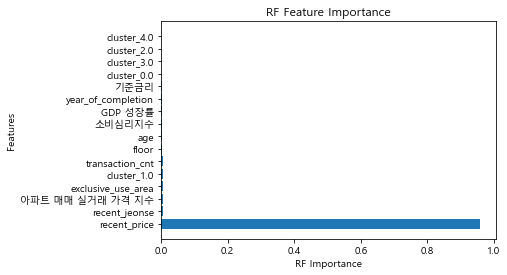

In [117]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = train_x.columns

# 피쳐 중요도에 따라 내림차순으로 인덱스를 정렬
indices = np.argsort(importances)[::-1]

# 피쳐 이름을 중요도 순서에 맞게 재배열
sorted_feature_names = [feature_names[i] for i in indices]

# 피쳐 중요도 시각화
plt.figure()
plt.title("RF Feature Importance")
plt.barh(range(train_x.shape[1]), importances[indices], align="center")
plt.yticks(range(train_x.shape[1]), sorted_feature_names)
plt.ylabel("Features")
plt.xlabel("RF Importance")
plt.show()

### LGBM - 22902

In [11]:
# 최적의 하이퍼파라미터로 모델 재학습
lgb = LGBMRegressor(random_state = 42)
lgb.fit(train_x, train_y)

# 예측
pred_val_ls = lgb.predict(val_x)

mae = mean_absolute_error(val_y, pred_val_ls)
print(mae)

22902.243938001815


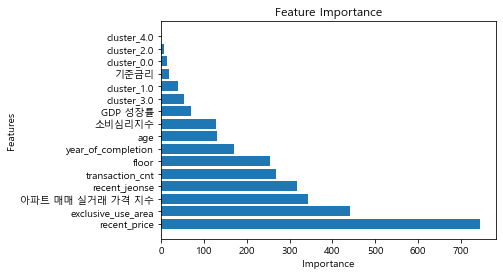

In [12]:
import matplotlib.pyplot as plt

importances = lgb.feature_importances_
feature_names = train_x.columns

# 피쳐 중요도에 따라 내림차순으로 인덱스를 정렬
indices = np.argsort(importances)[::-1]

# 피쳐 이름을 중요도 순서에 맞게 재배열
sorted_feature_names = [feature_names[i] for i in indices]

# 피쳐 중요도 시각화
plt.figure()
plt.title("Feature Importance")
plt.barh(range(train_x.shape[1]), importances[indices], align="center")
plt.yticks(range(train_x.shape[1]), sorted_feature_names)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

### CatBoost - 26683

In [13]:
cat = CatBoostRegressor(random_state = 42)
cat.fit(train_x, train_y)

# 예측
pred_val_ls = cat.predict(val_x)

mae = mean_absolute_error(val_y, pred_val_ls)

Learning rate set to 0.051777
0:	learn: 55782.6779265	total: 149ms	remaining: 2m 28s
1:	learn: 53303.7367616	total: 153ms	remaining: 1m 16s
2:	learn: 51002.3572834	total: 158ms	remaining: 52.6s
3:	learn: 48837.8669660	total: 163ms	remaining: 40.6s
4:	learn: 46797.6538694	total: 167ms	remaining: 33.3s
5:	learn: 44762.5525171	total: 172ms	remaining: 28.5s
6:	learn: 42864.6690067	total: 176ms	remaining: 24.9s
7:	learn: 41102.0814738	total: 179ms	remaining: 22.2s
8:	learn: 39424.8732568	total: 185ms	remaining: 20.4s
9:	learn: 37763.2877051	total: 189ms	remaining: 18.7s
10:	learn: 36140.7383671	total: 193ms	remaining: 17.3s
11:	learn: 34689.4542888	total: 198ms	remaining: 16.3s
12:	learn: 33240.6154726	total: 203ms	remaining: 15.4s
13:	learn: 31965.4106458	total: 207ms	remaining: 14.6s
14:	learn: 30795.3961424	total: 211ms	remaining: 13.8s
15:	learn: 29644.4720821	total: 217ms	remaining: 13.3s
16:	learn: 28530.9793909	total: 221ms	remaining: 12.8s
17:	learn: 27513.9369134	total: 230ms	remai

In [14]:
print(mae)

26683.867578733414


### XGB - 22540

In [15]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(train_x, train_y)

# 예측
pred_val_ls = xgb.predict(val_x)

mae = mean_absolute_error(val_y, pred_val_ls)
print(mae)

22540.628177472016


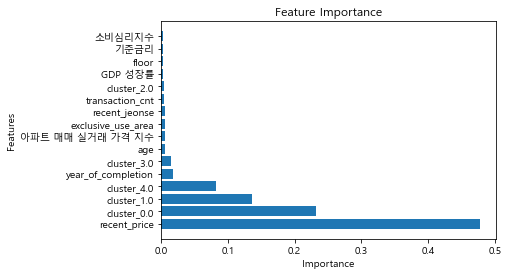

In [16]:
import matplotlib.pyplot as plt

importances = xgb.feature_importances_
feature_names = train_x.columns

# 피쳐 중요도에 따라 내림차순으로 인덱스를 정렬
indices = np.argsort(importances)[::-1]

# 피쳐 이름을 중요도 순서에 맞게 재배열
sorted_feature_names = [feature_names[i] for i in indices]

# 피쳐 중요도 시각화
plt.figure()
plt.title("Feature Importance")
plt.barh(range(train_x.shape[1]), importances[indices], align="center")
plt.yticks(range(train_x.shape[1]), sorted_feature_names)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

In [17]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

### GB - 20484

In [18]:
gb = GradientBoostingRegressor(random_state = 42)
gb.fit(train_x, train_y)

# 예측
pred_val_ls = gb.predict(val_x)

mae = mean_absolute_error(val_y, pred_val_ls)
print(mae)

20484.469043006655


# 제출 파일 생성

In [19]:
train_x = data.loc[data['train_test'] == 'train' ,columns]
train_y = data.loc[data['train_test'] == 'train','transaction_real_price' ]

In [20]:
test_x = data.loc[data['train_test'] == 'test' ,columns]

In [21]:
model = RandomForestRegressor( random_state = 42)

model.fit(train_x, train_y)
pred = model.predict(test_x)

In [22]:
submission = pd.read_csv('../data/sample_submission.csv')

In [23]:
submission['transaction_real_price'] = pred

In [24]:
submission.head()

,id,transaction_real_price
0,TEST_0000,184162.5
1,TEST_0001,408900.0
2,TEST_0002,183379.0
3,TEST_0003,279295.0
4,TEST_0004,183297.0


In [25]:
submission.to_csv('../result/submission_log.csv',index = False)

## 최적화

In [26]:
#!pip install optuna

In [29]:
import optuna

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth' : trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 3, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 10),
        'min_weight_fraction_leaf': 0.0,
        'max_features': 1.0,
        'max_leaf_nodes': None,
        'min_impurity_decrease': 0.0,
        'bootstrap': True,
        'n_jobs': None
    }
    model = RandomForestRegressor(**param,random_state = 42)
    model.fit(train_x, train_y)
    pred_y = model.predict(val_x)
    return mean_absolute_error(val_y, pred_y)

In [32]:
# Random Forest Optuna 실행
study_rf = optuna.create_study(direction='minimize', study_name='regression_rf')
study_rf.optimize(objective, n_trials = 50)

[I 2024-04-04 21:26:56,182] A new study created in memory with name: regression_rf
[I 2024-04-04 21:27:02,930] Trial 0 finished with value: 12704.593735413384 and parameters: {'n_estimators': 907, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 0 with value: 12704.593735413384.
[I 2024-04-04 21:27:16,324] Trial 1 finished with value: 8114.854710316887 and parameters: {'n_estimators': 718, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 1 with value: 8114.854710316887.
[I 2024-04-04 21:27:20,562] Trial 2 finished with value: 16319.886548615947 and parameters: {'n_estimators': 599, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 1 with value: 8114.854710316887.
[I 2024-04-04 21:27:25,725] Trial 3 finished with value: 11124.399530434259 and parameters: {'n_estimators': 478, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1 with value: 8114.854710316887.
[I 2024-04-04 

- 모델의 성능에 가장 큰 영향을 미치는 파라미터는 max_depth로 나타남
- 결정 트리의 깊이가 성능에 중요한 역할을 한다는 것을 시사함

- max_depth를 조절함으로써, 결정 트리의 최대 깊이를 지정할 수 있음
- 과적합 또는 과소적합을 방지할 수 있음
- 적절한 깊이 설정을 통해 모델의 성능을 향상시킬 수 있음

In [33]:
optuna.visualization.plot_param_importances(study_rf) # 파라미터 중요도 확인 그래프

In [34]:
optuna.visualization.plot_optimization_history(study_rf) # 최적화 과정 시각화

In [35]:
print('Best parameters', study_rf.best_params)
print('Best value', study_rf.best_value)

Best parameters {'n_estimators': 810, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3}
Best value 7688.431856078183


In [36]:
# 최적의 하이퍼파라미터로 모델 재학습
rf = RandomForestRegressor(**study_rf.best_params,
                   random_state = 42)
rf.fit(train_x, train_y)

# 예측
pred_val_ls = rf.predict(val_x)

mae = mean_absolute_error(val_y, pred_val_ls)
print(mae)

7688.431856078183


# 제출 파일 생성

In [72]:
train_x = data.loc[data['train_test'] == 'train' ,columns]
train_y = data.loc[data['train_test'] == 'train','transaction_real_price' ]

In [73]:
test_x = data.loc[data['train_test'] == 'test' ,columns]

In [74]:
model = RandomForestRegressor(**study_rf.best_params,
                   random_state = 42)

model.fit(train_x, train_y)
pred = model.predict(test_x)

In [75]:
submission = pd.read_csv('../data/sample_submission.csv')

In [76]:
submission['transaction_real_price'] = pred

In [77]:
submission.head()

,id,transaction_real_price
0,TEST_0000,188260.694633
1,TEST_0001,399925.204638
2,TEST_0002,185271.277330
3,TEST_0003,276300.387755
4,TEST_0004,184092.704436


In [78]:
submission.to_csv('../result/submission_log.csv',index = False)

### 시계열

#### RandomForest

In [79]:
validation_year = 2022

lst= []
for validation_year in [2016,2017,2018, 2019, 2020, 2021, 2022]:

    train_x = data.loc[(data['train_test'] == 'train') & (data['transaction_year'] < validation_year), columns]
    train_y = data.loc[(data['train_test'] == 'train') & (data['transaction_year'] < validation_year), 'transaction_real_price']
    
    val_x = data.loc[(data['train_test'] == 'train') & (data['transaction_year'] == validation_year), columns]
    val_y = data.loc[(data['train_test'] == 'train') & (data['transaction_year'] == validation_year), 'transaction_real_price']
    
    #train_x = train_x[train_x.columns[indices[:8]]]
    #val_x = val_x[val_x.columns[indices[:8]]]
    
    model_trial = RandomForestRegressor(**study_rf.best_params,random_state = 42)
    
    model_trial.fit(train_x, train_y)

    # 예측
    pred_val_ls = model_trial.predict(val_x)
    mae = mean_absolute_error(val_y, pred_val_ls)


    lst.append([validation_year, mae,np.mean(pred_val_ls)])

In [80]:
df1 = data.groupby(['transaction_year'])['transaction_real_price'].mean().to_frame()
df1

,transaction_real_price
transaction_year,
2014,106185.711250
2015,110309.440252
2016,130000.371859
2017,151252.261374
2018,189034.729128
2019,215164.816901
2020,223746.014925
2021,235667.377432
2022,217700.000000


In [81]:
df1.reset_index(inplace = True)

In [82]:
df2 = pd.DataFrame(lst, columns = ['transaction_year','mae','transaction_predict_price'])

In [83]:
df3 = pd.merge(df1, df2, how = 'left', on = 'transaction_year')
df3

,transaction_year,transaction_real_price,mae,transaction_predict_price
0,2014,106185.711250,NaN,NaN
1,2015,110309.440252,NaN,NaN
2,2016,130000.371859,5979.893091,127627.382381
3,2017,151252.261374,8524.146734,146419.197129
4,2018,189034.729128,13935.109830,179710.999349
5,2019,215164.816901,14249.135869,207979.708601
6,2020,223746.014925,13960.052803,219297.820659
7,2021,235667.377432,17079.540454,223567.262529
8,2022,217700.000000,19301.982314,207020.087466
9,2023,NaN,NaN,NaN


- 과거 데이터에 대해 더 잘 예측하는 것으로 보임

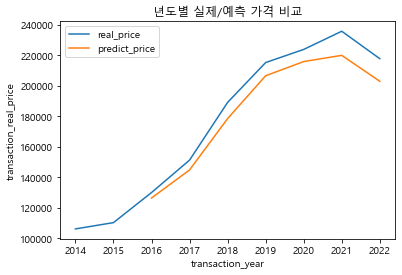

In [103]:
sns.lineplot( data = df3,  x = 'transaction_year', y = 'transaction_real_price', label = 'real_price')
sns.lineplot( data = df3,  x = 'transaction_year', y = 'transaction_predict_price', label = 'predict_price')

plt.title('년도별 실제/예측 가격 비교')
plt.show()

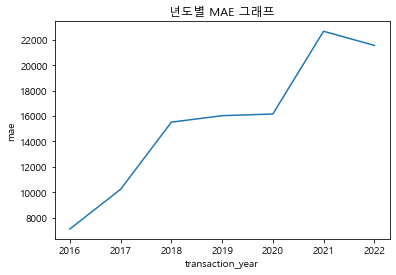

In [106]:
sns.lineplot( data = df3,  x = 'transaction_year', y = 'mae')
plt.title('년도별 MAE 그래프')
plt.show()